<h1>Bayesian Optimization with Hyperplot</h1>
<img src='images/images.jpg'>
<br>
<p>
    Hyperparameter optimization for machine learning models is a critical part of the workflow pipeline, for example optimizing the parameters of a machine learning model is to obtain the hyperparameters with the lowest validation loss.
    <br>
    <br>
    Based on a probabilistic model based approach for the objective of finding the minimum of any function that returns a real value metrict, it does not matter if it is for the loss of a machine learning model or the validation error of deep neural network, <b>Bayesian Optimization</b> yields better resutls than manual, random or grid search methods.
    <br>
    <br>
    <b>The results are better with an overall perfomance on the test set and it requires less time for optimization</b>.
    <br>
    <br>
    Thanks to the Python Library <a href='https://hyperopt.github.io/hyperopt/'>Hyperopt</a> brings an easy implementation of the powerfull technique of Bayesian Optimization.
    <br>
    <h2>Hyperpot</h2>
    <br>
    Hyperpot is an open-source Python library for Bayesian Optimization that implements SMBO using the Tree-Structured-Estimator. In this notebook  random search and the Tree-Parzen Estimator, a Sequential Model-Based Optimization method, these methods will be implemented by using the library  Hyperopt.
    <br>
    <br>
    A simple problem will be the one helping us to learn and understand the basics of these techniques, but first it is necessary to install hyperopt.
</p>

In [1]:
!pip install hyperopt --user

In [32]:
#Import necessary packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from hyperopt import hp
from hyperopt import rand, tpe
from hyperopt import Trials
from hyperopt import fmin
from hyperopt.pyll.stochastic import sample
from hyperopt import STATUS_OK
from timeit import default_timer as timer

<h2>Objective</h2>
<p>
    The objective function, it is going to be an easier one a <b>polynomial function</b> with the goal being to find the minimun value.
    The function has one global minimum over the range we define it as well as one local minimum.

When the the objective function it is defined, it is necessaty asure that returns a single real-value number to minimize. If metric such as accuracy is used, then we would have to return the negative of accuracy to tell our model to find a better accuracy! We can also return a dictionary (we will see this later) where one of the keys must be "loss". Here we will just return the output of the function $f(x)$
</p>

In [3]:
# Objective function to minimize
def objectiveFunction(x):
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])
    return f(x) * 0.05

Minimum of -219.8012 occurs at 4.8779


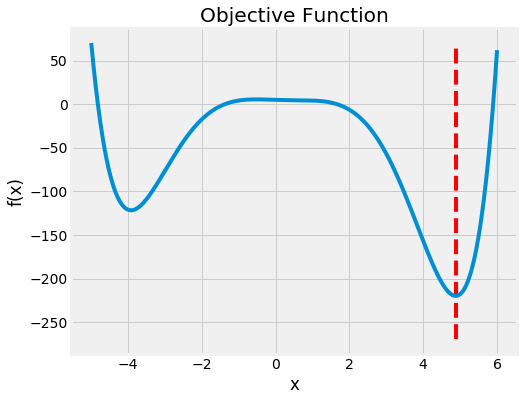

In [4]:
# Space over which to evaluate the function is -5 to 6
x = np.linspace(-5, 6, 10000)
y = objectiveFunction(x)

miny = min(y)
minx = x[np.argmin(y)]

# Visualize the function
plt.figure(figsize = (8, 6))
plt.style.use('fivethirtyeight')
plt.title('Objective Function'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 50, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y);

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))

<h2>Domain</h2>
<p>
    The domain is the values of $x$ over which the function is evaluated, this evaluation is donw by using an uniform distribution over the space that the function is defined.
</p>

In [5]:
# Create the domain space
space = hp.uniform('x', -5, 6)

<p>
    The samples can be drawn from the space using Hyperopt utility, this is helpful for visualizing a distribution.
</p>

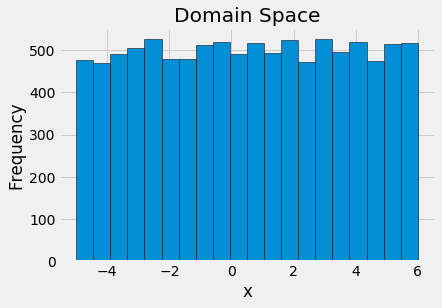

In [6]:
samples = []

# Sample 10000 values from the range
for _ in range(10000):
    samples.append(sample(space))

# Histogram of the values
plt.hist(samples, bins = 20, edgecolor = 'black');
plt.xlabel('x');
plt.ylabel('Frequency');
plt.title('Domain Space');

<p>
When running, our algorithm will sample values from this distribution, initially at random as it explores the domain space, but then over time, it will "focus" on the most promising values. Therefore, the algorithm should more values around 4.9, the minimum of the function. We can compare this to random search which should try values evenly from the entire distribution.
</p>
<h1>Hyperparameter Optimization Algorithm</h1>
<p>
    Hyperopt offers two choices for hyperparameter optimization, these choices are:
    <ul>
        <li><code>rand</code> for random search.</li>
        <li><code>tpe</code> for Tree Parzen Estimator.</li>
    </ul>
    Both algorithms are going to be compare for results, whatever algorithm is choose will configure automatically configures the algorithm.
</p>

In [7]:
# Create the algorithms
tpe_algorithm = tpe.suggest
rand_algorithm = rand.suggest

<h2>History</h2>
<p>
    Thanks to the object <code>Trials</code> the history can be stored, this object is passed into the function call, <i>is not strictly necessary</i>, what the object <code>Trials</code> is to bring information  that can be understood of what the algorithm is doing.
</p>

In [8]:
# Create two trials objects, one for tpe and the other one for rand
tpe_trials = Trials()
rand_trials = Trials()

<h2>Run the Optimization</h2>
<p>
    It is time to start minimizing the objective function, this will be done by running 3000 runs of the minimization with the random algorithm and TPE algorithm.
    <br>
    <br>
    The <code>fmin</code> function takes in exactly the four parts specified above as well as the maximum number of evaluations to run. A set <code>rstate</code> for reproducible results across multiple runs.
</p>

In [10]:
# Run 3000 evaluations with the rand algorithm
rand_best = fmin(fn=objectiveFunction,
                 space=space,
                 algo=rand_algorithm,
                 trials=rand_trials,
                 max_evals=3000,
                 rstate=np.random.RandomState(50),
                )

print('rand best:{}'.format(rand_best))

100%|██████████| 3000/3000 [00:04<00:00, 681.72it/s, best loss: -219.80116907646868]
rand best:{'x': 4.877613189834774}


In [13]:
tpe_best = fmin(fn=objectiveFunction,
                 space=space,
                 algo=tpe_algorithm,
                 trials=tpe_trials,
                 max_evals=3000,
                 rstate=np.random.RandomState(50),
                )

print('tpe best:{}'.format(tpe_best))

100%|██████████| 3000/3000 [00:26<00:00, 114.37it/s, best loss: -219.80118811219114]
tpe best:{'x': 4.878481851906148}


In [14]:
# Print out information about losses
print('Minimum loss attained with TPE:    {:.4f}'.format(tpe_trials.best_trial['result']['loss']))
print('Minimum loss attained with random: {:.4f}'.format(rand_trials.best_trial['result']['loss']))
print('Actual minimum of f(x):            {:.4f}'.format(miny))

# Print out information about number of trials
print('\nNumber of trials needed to attain minimum with TPE:    {}'.format(tpe_trials.best_trial['misc']['idxs']['x'][0]))
print('Number of trials needed to attain minimum with random: {}'.format(rand_trials.best_trial['misc']['idxs']['x'][0]))

# Print out information about value of x
print('\nBest value of x from TPE:    {:.4f}'.format(tpe_best['x']))
print('Best value of x from random: {:.4f}'.format(rand_best['x']))
print('Actual best value of x:      {:.4f}'.format(minx))

Minimum loss attained with TPE:    -219.8012
Minimum loss attained with random: -219.8012
Actual minimum of f(x):            -219.8012

Number of trials needed to attain minimum with TPE:    655
Number of trials needed to attain minimum with random: 235

Best value of x from TPE:    4.8785
Best value of x from random: 4.8776
Actual best value of x:      4.8779


<p>
    TPE estimator and random search estimator, both of them obtained the same results, it is observable that random search found the minimum in less iterations than TPE, after getting this minimum it is possible to stop running the algorithm.
    <br>
    <br>
    Now it is good to measure how much time does these methods requiered to solve the get the minimum.
</p>

In [16]:
%%timeit -n 3
# Run 3000 evals with the tpe algorithm
best = fmin(fn=objectiveFunction, space=space, algo=rand_algorithm, max_evals=3000)

100%|██████████| 3000/3000 [00:04<00:00, 633.58it/s, best loss: -219.80117992394003]
4.52 s ± 103 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [17]:
%%timeit -n 3
# Run 3000 evals with the tpe algorithm
best = fmin(fn=objectiveFunction, space=space, algo=tpe_algorithm, max_evals=3000)

100%|██████████| 3000/3000 [00:26<00:00, 113.74it/s, best loss: -219.8011971657388] 
26.3 s ± 378 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


<p>
    It can be seem that the random algorithm it is faster than TPE algorithm, this happens because the TPE algorithm it is taking more time in choosing the adequate next set of parameters while the random method is just choosing from the space <i>randomly</i>.
    <br>
    <br>
    The TPE requires more time to choose the set of parameters due to it has to choose those that make fewer overall calls to the objective function.
    
<h2>Results</h2>
<br>
Both models returned values very close to the optimal, lets see how they differ in the search procedure.
<h3>TPE Results</h3>
</p>

In [18]:
tpe_results = pd.DataFrame({'loss': [x['loss'] for x in tpe_trials.results],
                            'iteration': tpe_trials.idxs_vals[0]['x'],
                            'x': tpe_trials.idxs_vals[1]['x']})
tpe_resultsults.head()

,loss,iteration,x
0,36.210073,0,5.957885
1,-202.384052,1,4.470885
2,-75.519449,2,3.218963
3,5.543552,3,-0.515859
4,35.078011,4,-4.916832


<p>
    To get more useful information the objective function can be formatted.
    <br>
    First the values are going to be plotte. While the algorithm progresses, the values should tend to cluster around the actual best value, which is near 4.9.
</p>

In [19]:
tpe_results['rolling_average_x'] = tpe_results['x'].rolling(50).mean().fillna(method = 'bfill')
tpe_results['rolling_average_loss'] = tpe_results['loss'].rolling(50).mean().fillna(method = 'bfill')
tpe_results.head()

,loss,iteration,x,rolling_average_x,rolling_average_loss
0,36.210073,0,5.957885,2.105103,-74.393795
1,-202.384052,1,4.470885,2.105103,-74.393795
2,-75.519449,2,3.218963,2.105103,-74.393795
3,5.543552,3,-0.515859,2.105103,-74.393795
4,35.078011,4,-4.916832,2.105103,-74.393795


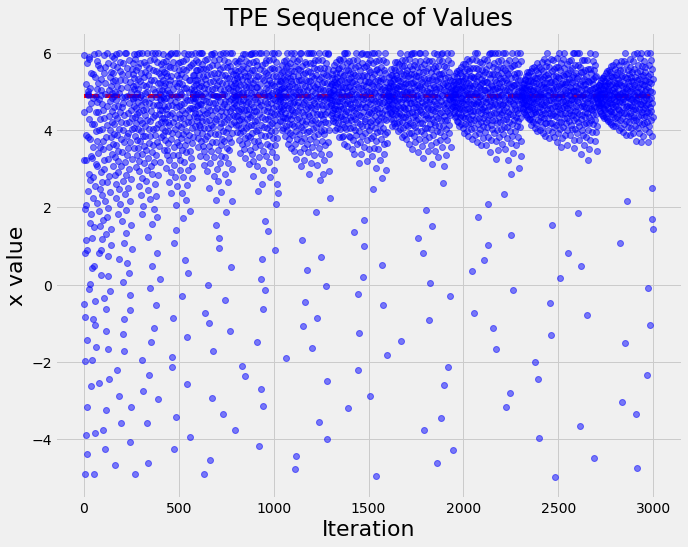

In [21]:
plt.figure(figsize = (10, 8))
plt.plot(tpe_results['iteration'], tpe_results['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); plt.title('TPE Sequence of Values', size = 24);
plt.hlines(minx, 0, 3000, linestyles = '--', colors = 'r');

<p>
    Over time the algorithm tends to try values closer to 4.9.
    <br>
    The local minimum around -4 likely threw off the algorithm initially, bu the points tend to cluster arounds the actual minimum as the algorithm progress.
    <br>
    <br>
    A histogram will be plotted, it will help to see the distribution of the values that the algorithm tried.
</p>

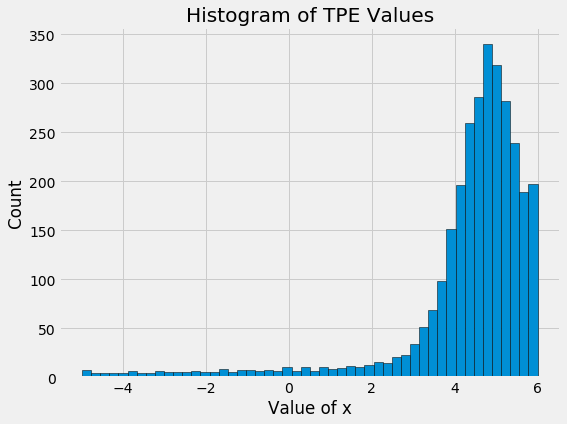

In [24]:
plt.figure(figsize=(8, 6))
plt.hist(tpe_results['x'], bins=50, edgecolor='k')
plt.title('Histogram of TPE Values');
plt.xlabel('Value of x');
plt.ylabel('Count');

<p>
The algorithm tried many values closer to 4.9, this clearly demostrates the benefits of choosing the next values based on the past values: <b>more evaluations of promising values.</b>
</p>

Best Loss of -219.8012 occured at iteration 655


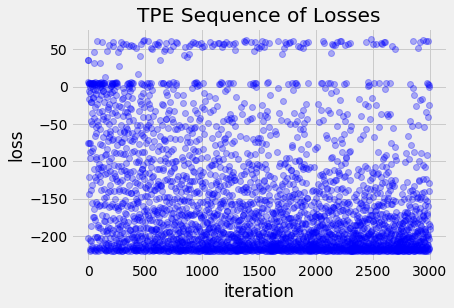

In [26]:
# Sort with best loss first
tpe_results = tpe_results.sort_values('loss', ascending = True).reset_index()

plt.plot(tpe_results['iteration'], tpe_results['loss'], 'bo', alpha = 0.3);
plt.xlabel('iteration'); plt.ylabel('loss'); plt.title('TPE Sequence of Losses');

print('Best Loss of {:.4f} occured at iteration {}'.format(tpe_results['loss'][0], tpe_results['iteration'][0]))

<h3>Random Results</h3>
<p>
    Here the results from the algorithm TPE will be constrasted against the results from the Random algorithm, as this part main consist in showing the results from the Random algorithm, is not expected to display any trend in values evaluated over time because the values were selected randomly.
</p>

In [27]:
rand_results = pd.DataFrame({'loss': [x['loss'] for x in rand_trials.results],
                             'iteration': rand_trials.idxs_vals[0]['x'],
                             'x': rand_trials.idxs_vals[1]['x']})
                            
rand_results.head()

,loss,iteration,x
0,36.210073,0,5.957885
1,-202.384052,1,4.470885
2,-75.519449,2,3.218963
3,5.543552,3,-0.515859
4,35.078011,4,-4.916832


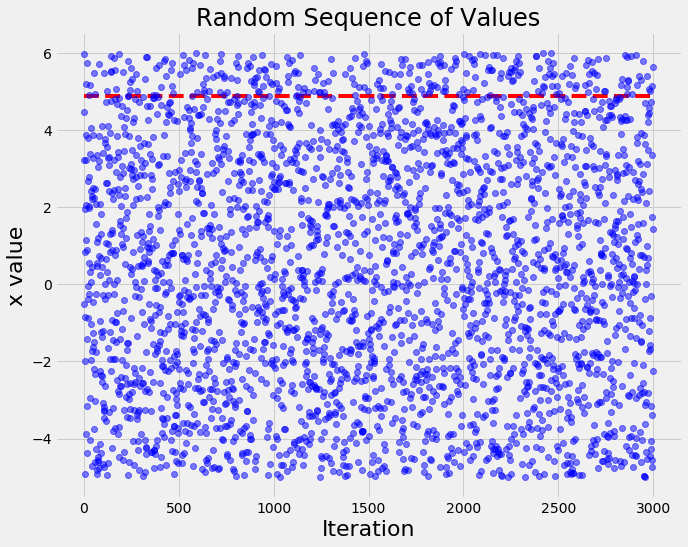

In [28]:
plt.figure(figsize = (10, 8))
plt.plot(rand_results['iteration'], rand_results['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); plt.title('Random Sequence of Values', size = 24);
plt.hlines(minx, 0, 3000, linestyles = '--', colors = 'r');

<p>
    As the algorithm chooses random values, any trend can not be presented.
</p>

Best Loss of -219.8012 occured at iteration 235


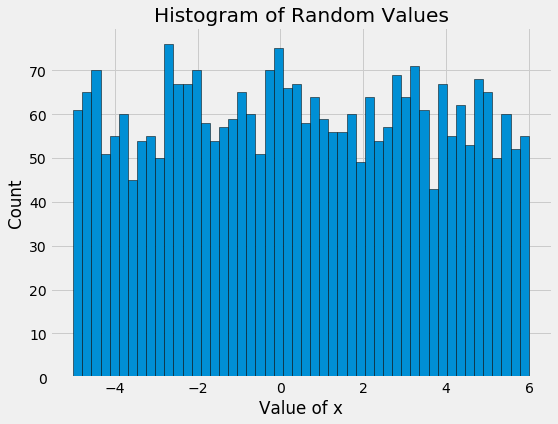

In [29]:
# Sort with best loss first
rand_results = rand_results.sort_values('loss', ascending = True).reset_index()

plt.figure(figsize = (8, 6))
plt.hist(rand_results['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of Random Values');
plt.xlabel('Value of x');
plt.ylabel('Count');

# Print information
print('Best Loss of {:.4f} occured at iteration {}'.format(rand_results['loss'][0], rand_results['iteration'][0]))

<p>
There is no discernable clustering because this method is choosing the next values randomly. In this case, it happended across the minimum of the function because it was a relatively simple problem and we used many iterations. This would not likely be the case when we are optimizing more complex functions.
</p>

<h2>Some Helpful Tricks</h2>
<p>
    There are two Tricks that will help in making the process of hyperparameter optimization more efficient, these tricks are:
    <ul>
        <li>Better domain space over which to search.</li>
        <li>Return more useful information from the objective function.</li>
    </ul>
    These trick are helpful for hyperparameter optimization.
    <br>
    <br>
    <i>Master the details on the easy problems so you can use the tools more effectively on the difficult problems. -A cool dude from the internet.</i>
    <h3>Better Domain Space</h3>
    <p>
    In this problem, we can cheat because we know where the minimum is and therefore can define a region of higher probability around this value of x. In more complicated problems, we don't have a graph to show us the minimum, but we can still use experience and knowledge to inform our choice of a domain space.

Here we will make a normally distributed domain space around the value where the minimum of the objective function occurs, around 4.9. This is simple to do in Hyperopt.
</p>

In [30]:
# Normally distributed space
space = hp.normal('x', 4.9, 0.5)

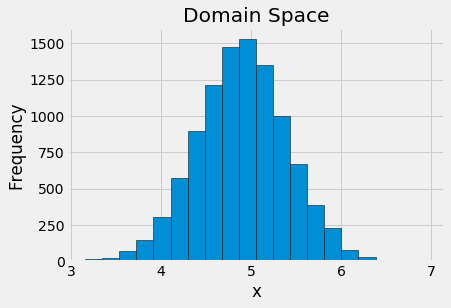

In [31]:
samples = []

# Sample 10000 values from the range
for _ in range(10000):
    samples.append(sample(space))
    

# Histogram of the values
plt.hist(samples, bins = 20, edgecolor = 'black'); 
plt.xlabel('x'); plt.ylabel('Frequency'); plt.title('Domain Space');

<p>
    Much closer to the true value! This would help both the random search and the TPE find the minimum quicker (for random search it would help because we are concentrating the possible values around the optimum).
    <br>
    <h3>Returned more useful Information from the objective function</h3>
    <br>
    Another modification to make is to return more useful information from the objective function. We do this using a dictionary with any information we want included. The only requirements are that the dictionary must contain a single real-valued metric to minimize stored under a "loss" key and whether the function sucessfully ran, stored under a "status" key. Here we make the modifications to the objective to store the value of x as well as the time to evaluate.
</p>

In [33]:
# Objective function to minimize with smarter return values
def objectiveFunction(x):    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])

    # Evaluate the function
    start = timer()
    loss = f(x) * 0.05
    end = timer()
    
    # Calculate time to evaluate
    time_elapsed = end - start
    
    results = {'loss': loss, 'status': STATUS_OK, 'x': x, 'time': time_elapsed}
    
    # Return dictionary
    return results

<p>
    Let's run the algorithm the same as before and create a new <code>Trials</code> object to save new results.
</p>

In [36]:
# New trials object
trials = Trials()

# Run 2000 evals with the tpe algorithm
best = fmin(fn=objectiveFunction,
            space=space,
            algo=tpe_algorithm,
            trials=trials,
            max_evals=2000,
            rstate= np.random.RandomState(120))

100%|██████████| 2000/2000 [00:11<00:00, 181.79it/s, best loss: -219.80120395524256]


<p>
    This time our trials object will have all of our information in the results attribute.
</p>

In [37]:
results = trials.results
results[:2]

[{'loss': -189.3682041842684,
  'status': 'ok',
  'x': 5.312379584994148,
  'time': 3.413699960219674e-05},
 {'loss': -219.325099632915,
  'status': 'ok',
  'x': 4.8166084516702705,
  'time': 3.0396000511245802e-05}]

<p>
This time we have more information from the results. We can extract the results into a dataframe for inspect and plotting if we like.
</p>

In [38]:
# Results into a dataframe
results_df = pd.DataFrame({'time': [x['time'] for x in results], 
                           'loss': [x['loss'] for x in results],
                           'x': [x['x'] for x in results],
                            'iteration': list(range(len(results)))})

# Sort with lowest loss on top
results_df = results_df.sort_values('loss', ascending = True)
results_df.head()

,time,loss,x,iteration
956,0.000023,-219.801204,4.878152,956
1316,0.000024,-219.801204,4.878111,1316
402,0.000023,-219.801204,4.878189,402
914,0.000052,-219.801203,4.878064,914
1954,0.000024,-219.801203,4.878222,1954


<p>
    This was a simple optimization problem, so the lowest score obtained does not really differ from that with the uniform distribution. It took around the same number of iterations to converge. We can compare the distribution though to see if better values were tried.
</p>

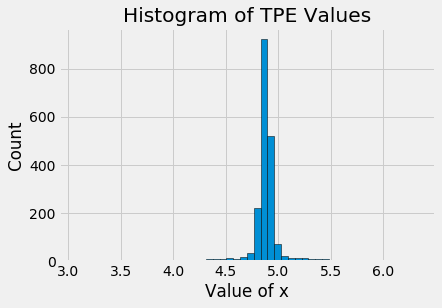

In [39]:
plt.hist(results_df['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of TPE Values');
plt.xlabel('Value of x'); plt.ylabel('Count');

<p>
    Indeed the values of $x$ evaluated cluster much closer to the optimum! The algorithm spend much more time around the best value than searching the domain space. We can compare this distribution to that attained with the TPE algorithm on the uniform domain using a Kernel Density Estimate Plot.
</p>

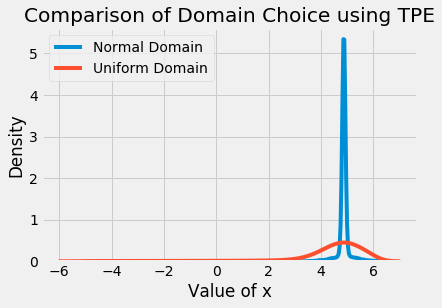

In [40]:
sns.kdeplot(results_df['x'], label = 'Normal Domain')
sns.kdeplot(tpe_results['x'], label = 'Uniform Domain')
plt.legend(); plt.xlabel('Value of x');
plt.ylabel('Density');
plt.title('Comparison of Domain Choice using TPE');

In [41]:
print('Lowest Value of the Objective Function = {:.4f} at x = {:.4f} found in {:.0f} iterations.'.format(results_df['loss'].min(),
                                                                             results_df.loc[results_df['loss'].idxmin()]['x'],
                                                                             results_df.loc[results_df['loss'].idxmin()]['iteration']))

Lowest Value of the Objective Function = -219.8012 at x = 4.8782 found in 956 iterations.


<p>
    Well that definitely shows the value of choosing a good prior! When it comes to hyperparameter tuning, we often do not know ahead of time what values to concentrate around but we can try to use past experience or the work of others to inform our search spaces.
    <h3>One-Line Optimization</h3>
</p>

In [42]:
# Just because you can do it in one line doesn't mean you should! 
best = fmin(fn = lambda x: np.poly1d([1, -2, -28, 28, 12, -26, 100])(x) * 0.05,
            space = hp.normal('x', 4.9, 0.5), algo=tpe.suggest, 
            max_evals = 2000)

best

100%|██████████| 2000/2000 [00:11<00:00, 181.15it/s, best loss: -219.80120393286012]


{'x': 4.878155627408757}

<h2>Conclusions</h2>
<p>
This notebooks provides a very basic implementation of Bayesian Model Based optimization using Hyperpot, for this implementation it is requiered four parts:
<ul>
    <li>Objective: is what we want to optimize? Performance, time comsumption, an specific metric such as accuracy, precission and recall...</li>
    <li>Domain: Values of the parameters over which to minimize the objective.</li>
    <li>Hyperparameter Optimization Function: How the surrogate function is built and the next values are proposed.</li>
    <li>Trials: A History consisting of scores, parameters pairs.</li>
</ul>
It is clearly demostrated the differences between random search and and Sequential Model-Based Optimization, which are:
<ul>
    <li>random search is <i>uninformed</i> and therefore requires more trials to minimize the objective function.</li>
    <li>The Tree Parzen Estimator, an algorithm used for SMBO, spends more time choosing the next values, but overall requires fewer evaluations of the objective function because it is able to <i>reason</i> about the next values to evaluate.</li>
    <li>Over many iterations, SMBO algorithms concentrate the search around the most promising values, yielding:
        <ul>
            <li>Lower scores on the objective function</li>
            <li>Faster optimization</li>
        </ul>
    </li>
</ul>
    <br>
Bayesian model-based optimiziation is the construction of a probability model $p(y | x)$ of the objective function and updating this model as more information is collected. As the number of evaluations increases, the model (also called a surrogate function) becomes a more accurate respresentation of the objective function and the algorithm spends more time evaluating promising values.

This notebook showed a the basic implementation of Bayesian Model-Based optimization using Hyperopt, but already we can see how it has significant advantages over random or grid search based methods.
</p>
<div style='background-color: #	#ffe6e6; padding:20px; margin-top: 20px;'>
    <p>
        This notebook was developed thanks to the amazing explanation and work of <a href='https://towardsdatascience.com/@williamkoehrsen'>Will Koehrsen</a>.
    </p>
</div>